![](https://i.imgur.com/zpgEu5r.png)

- Ver: 
  - https://github.com/marsgr6/r-scripts/blob/master/notebooks/distribution_fitting_r.ipynb
  - https://github.com/marsgr6/r-scripts/blob/master/notebooks/distribution_fitting_python.ipynb

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# También puede leer el archivo desde el repositorio de GitHub.
data = pd.read_csv("https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/CHR_data.csv")

In [3]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


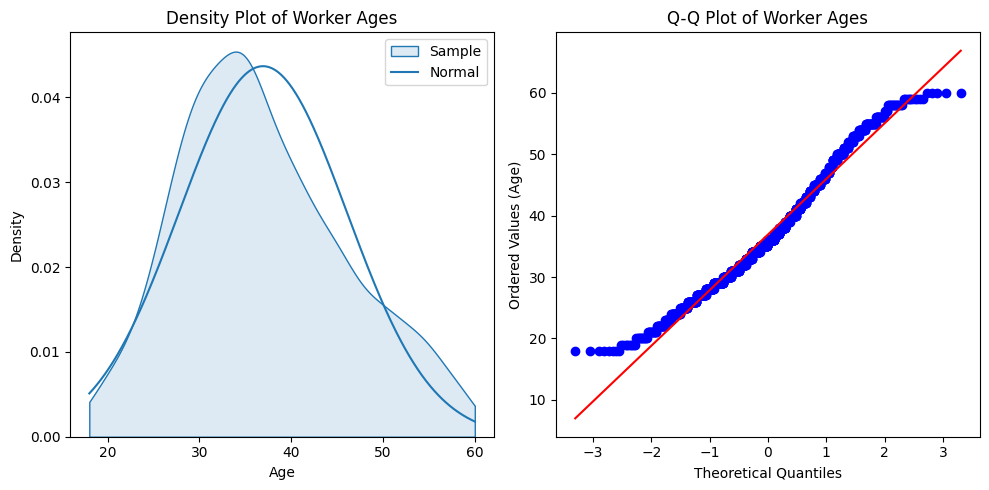

In [20]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Left pane: Density plot
x = np.linspace(data.Age.min(), data.Age.max(), 1000)
sns.kdeplot(data.Age, fill=True, alpha=0.15, cut=0, ax=ax1, label="Sample")
ax1.plot(x, stats.norm.pdf(x, data.Age.mean(), data.Age.std(ddof=0)), label="Normal")
ax1.set_xlabel("Age")
ax1.set_ylabel("Density")
ax1.set_title("Density Plot of Worker Ages")
ax1.legend()

# Right pane: Q-Q plot
stats.probplot(data.Age, dist="norm", plot=ax2)  # Use data.Age instead of data_age
ax2.set_title("Q-Q Plot of Worker Ages")
ax2.set_xlabel("Theoretical Quantiles")
ax2.set_ylabel("Ordered Values (Age)")

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

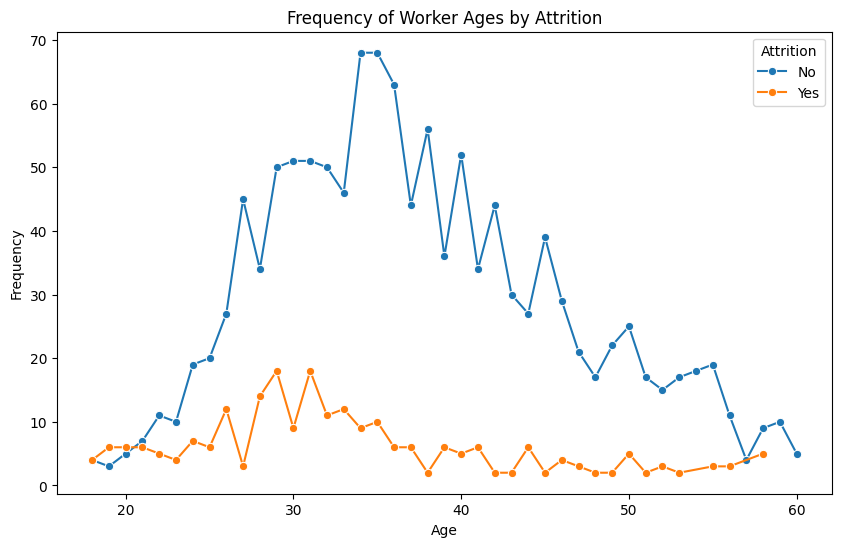

In [22]:
# Count the occurrences of each unique age, grouped by Attrition
age_counts = data.groupby(['Age', 'Attrition']).size().reset_index(name='Count')

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_counts, x="Age", y="Count", hue="Attrition", marker='o')
plt.title("Frequency of Worker Ages by Attrition")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(title="Attrition")
plt.show()

### Revise:

https://pub.aimind.so/understanding-kurtosis-exploring-the-shape-of-data-distribution-and-interpreting-qq-plots-2d264fa2aa79

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*YtidhzyY8VtL4-QE9ce3QQ.png)

<AxesSubplot: xlabel='Age', ylabel='Density'>

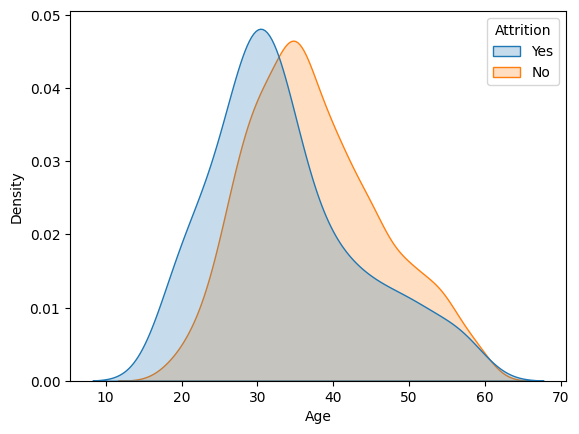

In [7]:
# prompt: build a kde for data.Age grouped by Attrition use common normalization as false fill true

sns.kdeplot(data=data, x="Age", hue="Attrition", common_norm=False, fill=True)

<Axes: xlabel='Age', ylabel='Density'>

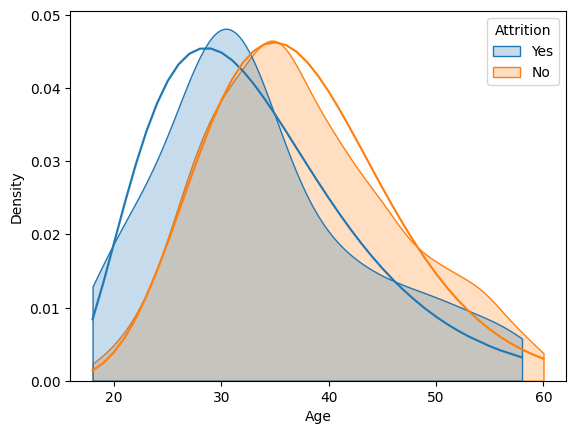

In [ ]:
# prompt: perform distribution fitting using scipy stats gamma fit for data.Age build two fits grouped for attrition groups

# Fit a gamma distribution to the data for each attrition group.
data_attrited = data[data["Attrition"] == "Yes"]
data_not_attrited = data[data["Attrition"] == "No"]

# Fit the gamma distribution to the data.
fit_attrited = stats.gamma.fit(data_attrited["Age"])
fit_not_attrited = stats.gamma.fit(data_not_attrited["Age"])

# Plot the fitted distributions.
sns.kdeplot(data=data, x="Age", hue="Attrition", common_norm=False, fill=True, cut=0)
sns.lineplot(x=data_attrited["Age"], y=stats.gamma.pdf(data_attrited["Age"], *fit_attrited))
sns.lineplot(x=data_not_attrited["Age"], y=stats.gamma.pdf(data_not_attrited["Age"], *fit_not_attrited))

<Axes: xlabel='Age', ylabel='Density'>

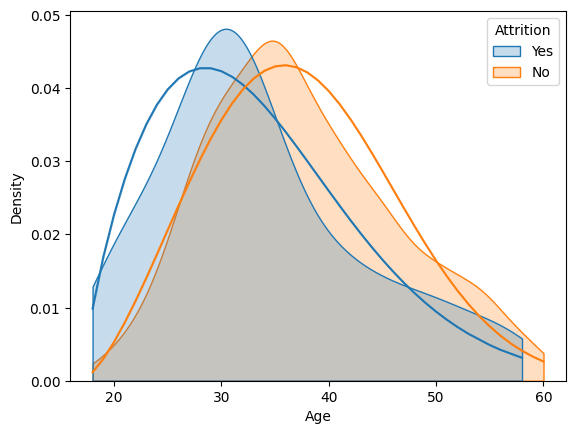

In [ ]:
# prompt: # prompt: perform distribution fitting using scipy stats weibull fit for data.Age build two fits grouped for attrition groups

# También puede leer el archivo desde el repositorio de GitHub.
data = pd.read_csv("https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/CHR_data.csv")


# Fit a weibull distribution to the data for each attrition group.
data_attrited = data[data["Attrition"] == "Yes"]
data_not_attrited = data[data["Attrition"] == "No"]

# Fit the weibull distribution to the data.
fit_attrited = stats.weibull_min.fit(data_attrited["Age"])
fit_not_attrited = stats.weibull_min.fit(data_not_attrited["Age"])

# Plot the fitted distributions.
sns.kdeplot(data=data, x="Age", hue="Attrition", common_norm=False, fill=True, cut=0)
sns.lineplot(x=data_attrited["Age"], y=stats.weibull_min.pdf(data_attrited["Age"], *fit_attrited))
sns.lineplot(x=data_not_attrited["Age"], y=stats.weibull_min.pdf(data_not_attrited["Age"], *fit_not_attrited))

# Prueba de Hipótesis Kolmogorov-Smirnov

Dada una muestra de datos $X_1, X_2, \ldots, X_n$ y una función de distribución acumulativa teórica $F(x)$, la prueba de hipótesis de Kolmogorov-Smirnov busca evaluar si la muestra sigue la distribución teórica. Aquí está un resumen más riguroso:

1. **Hipótesis Nula ($H_0$):**
   - $H_0$: La muestra sigue la distribución teórica ($F(x)$).

2. **Hipótesis Alternativa ($H_1$):**
   - $H_1$: La muestra no sigue la distribución teórica ($F(x)$).

3. **Estadístico de Prueba ($D$):**
   - El estadístico de prueba de KS se define como la máxima diferencia vertical entre la función de distribución acumulativa empírica (ECDF) de la muestra y la función de distribución acumulativa teórica:
     $$ D = \sup_x |F_n(x) - F(x)| $$

4. **Nivel de Significancia ($\alpha$):**
   - Establecemos el nivel de significancia para la prueba, comúnmente $\alpha = 0.05$ o $\alpha = 0.01$.

5. **Regla de Decisión:**
   - Rechazamos $H_0$ si $D$ es mayor que el valor crítico correspondiente a $\alpha$.

6. **P-Valor:**
   - El p-valor se calcula como la probabilidad de observar un $D$ tan extremo o más bajo bajo la hipótesis nula.

7. **Interpretación:**
   - Si el p-valor es menor que $\alpha$, se rechaza $H_0$, indicando que hay evidencia suficiente para afirmar que la muestra no sigue la distribución teórica.

La prueba de Kolmogorov-Smirnov es no paramétrica y no hace suposiciones sobre la forma específica de la distribución teórica. Proporciona un enfoque riguroso para evaluar la validez de la distribución asumida para una muestra de datos.

In [ ]:
# prompt: perform a Kolmogorov–Smirnov test for data.Age grouped by attrition using gamma fitting

from scipy.stats import kstest

# Fit a gamma distribution to the data for each attrition group.
data_attrited = data[data["Attrition"] == "Yes"]
data_not_attrited = data[data["Attrition"] == "No"]

# Fit the gamma distribution to the data.
fit_attrited = stats.gamma.fit(data_attrited["Age"])
fit_not_attrited = stats.gamma.fit(data_not_attrited["Age"])

# Perform the Kolmogorov-Smirnov test.
_, pval = kstest(data_attrited["Age"], stats.gamma.cdf, args=fit_attrited)
print("p-value for the Kolmogorov-Smirnov test for the attrition group 'Yes':", pval)

_, pval = kstest(data_not_attrited["Age"], stats.gamma.cdf, args=fit_not_attrited)
print("p-value for the Kolmogorov-Smirnov test for the attrition group 'No':", pval)

p-value for the Kolmogorov-Smirnov test for the attrition group 'Yes': 0.13113231469414066
p-value for the Kolmogorov-Smirnov test for the attrition group 'No': 0.017447190506019568


p-value for the Kolmogorov-Smirnov test for the attrition group 'Yes': 0.10344368767227607
p-value for the Kolmogorov-Smirnov test for the attrition group 'No': 0.000830042586803888


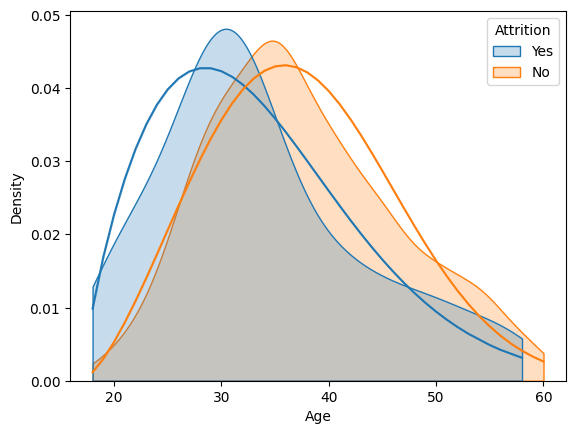

In [ ]:
# prompt: perform a Kolmogorov–Smirnov test for data.Age grouped by attrition using weibull fitting

data = pd.read_csv("https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/CHR_data.csv")

# Fit a weibull distribution to the data for each attrition group.
data_attrited = data[data["Attrition"] == "Yes"]
data_not_attrited = data[data["Attrition"] == "No"]

# Fit the weibull distribution to the data.
fit_attrited = stats.weibull_min.fit(data_attrited["Age"])
fit_not_attrited = stats.weibull_min.fit(data_not_attrited["Age"])

# Plot the fitted distributions.
sns.kdeplot(data=data, x="Age", hue="Attrition", common_norm=False, fill=True, cut=0)
sns.lineplot(x=data_attrited["Age"], y=stats.weibull_min.pdf(data_attrited["Age"], *fit_attrited))
sns.lineplot(x=data_not_attrited["Age"], y=stats.weibull_min.pdf(data_not_attrited["Age"], *fit_not_attrited))

# Perform the Kolmogorov-Smirnov test.
_, pval = kstest(data_attrited["Age"], stats.weibull_min.cdf, args=fit_attrited)
print("p-value for the Kolmogorov-Smirnov test for the attrition group 'Yes':", pval)

_, pval = kstest(data_not_attrited["Age"], stats.weibull_min.cdf, args=fit_not_attrited)
print("p-value for the Kolmogorov-Smirnov test for the attrition group 'No':", pval)


p-value for the Kolmogorov-Smirnov test for the attrition group 'Yes': 0.0019750379768559948
p-value for the Kolmogorov-Smirnov test for the attrition group 'No': 1.0256677438570993e-07


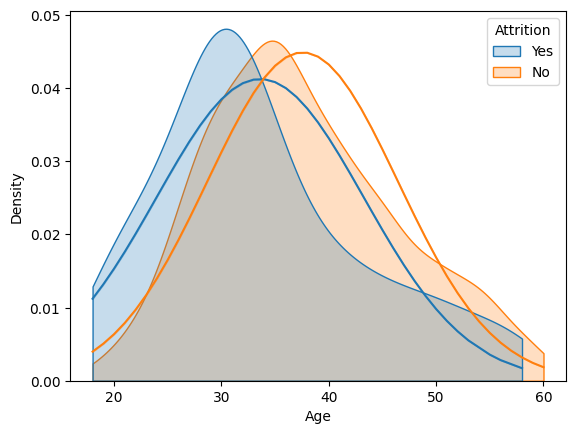

In [ ]:
# prompt: perform a Kolmogorov–Smirnov test for data.Age grouped by attrition using norm fitting

import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kstest

# También puede leer el archivo desde el repositorio de GitHub.
data = pd.read_csv("https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/CHR_data.csv")

# Fit a normal distribution to the data for each attrition group.
data_attrited = data[data["Attrition"] == "Yes"]
data_not_attrited = data[data["Attrition"] == "No"]

# Fit the normal distribution to the data.
fit_attrited = stats.norm.fit(data_attrited["Age"])
fit_not_attrited = stats.norm.fit(data_not_attrited["Age"])

# Plot the fitted distributions.
sns.kdeplot(data=data, x="Age", hue="Attrition", common_norm=False, fill=True, cut=0)
sns.lineplot(x=data_attrited["Age"], y=stats.norm.pdf(data_attrited["Age"], *fit_attrited))
sns.lineplot(x=data_not_attrited["Age"], y=stats.norm.pdf(data_not_attrited["Age"], *fit_not_attrited))

# Perform the Kolmogorov-Smirnov test.
_, pval = kstest(data_attrited["Age"], "norm", args=fit_attrited)
print("p-value for the Kolmogorov-Smirnov test for the attrition group 'Yes':", pval)

_, pval = kstest(data_not_attrited["Age"], stats.norm.cdf, args=fit_not_attrited)
print("p-value for the Kolmogorov-Smirnov test for the attrition group 'No':", pval)



In [ ]:
# prompt: perform a Kolmogorov–Smirnov test for data.Age grouped by attrition using lognorm fitting

data = pd.read_csv("https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/CHR_data.csv")

# Fit a lognormal distribution to the data for each attrition group.
data_attrited = data[data["Attrition"] == "Yes"]
data_not_attrited = data[data["Attrition"] == "No"]

# Fit the lognormal distribution to the data.
fit_attrited = stats.lognorm.fit(data_attrited["Age"])
fit_not_attrited = stats.lognorm.fit(data_not_attrited["Age"])

# Perform the Kolmogorov-Smirnov test.
_, pval = kstest(data_attrited["Age"], stats.lognorm.cdf, args=fit_attrited)
print("p-value for the Kolmogorov-Smirnov test for the attrition group 'Yes':", pval)

_, pval = kstest(data_not_attrited["Age"], stats.lognorm.cdf, args=fit_not_attrited)
print("p-value for the Kolmogorov-Smirnov test for the attrition group 'No':", pval)


p-value for the Kolmogorov-Smirnov test for the attrition group 'Yes': 0.23040851652326932
p-value for the Kolmogorov-Smirnov test for the attrition group 'No': 0.013638337990282407


# Requerimientos

```Python
!pip install fitter
```

2024-01-24 22:41:24.774 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.155432)
2024-01-24 22:41:25.018 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.155999)
2024-01-24 22:41:25.099 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponnorm distribution with error=0.154338)
2024-01-24 22:41:25.156 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.160458)
2024-01-24 22:41:25.225 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted weibull_min distribution with error=0.156727)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponnorm,0.154338,812.414051,822.818232,inf,0.062560,0.299117
lognorm,0.155432,804.526716,814.930897,inf,0.066796,0.230409
gamma,0.155999,800.248677,810.652857,inf,0.075101,0.131132
weibull_min,0.156727,793.595025,803.999205,inf,0.078329,0.103444
norm,0.160458,804.815091,811.751211,inf,0.119990,0.001975


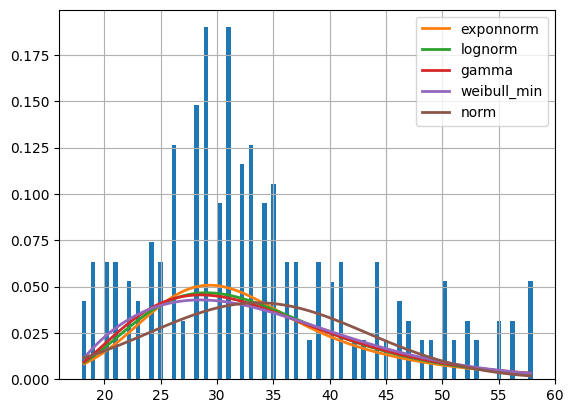

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data_attrited["Age"],
           distributions=['gamma',
                          'lognorm',
                          "exponnorm",
                          "weibull_min",
                          "norm"])
f.fit()
f.summary()

In [ ]:
f.get_best(method = 'sumsquare_error')

{'exponnorm': {'K': 1.865330359903275,
  'loc': 24.57509686577498,
  'scale': 4.842286258137776}}

p-value for the Kolmogorov-Smirnov test for the attrition group 'Yes': 0.2991170690280198
p-value for the Kolmogorov-Smirnov test for the attrition group 'No': 0.006561940367890462


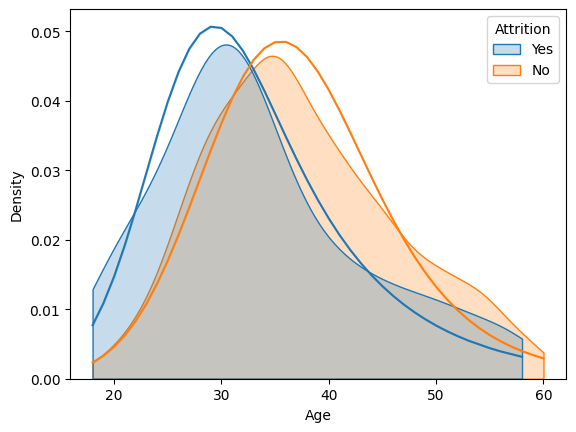

In [ ]:
# prompt: perform a Kolmogorov–Smirnov test for data.Age grouped by attrition using exponnorm fitting include graphs

import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kstest
from fitter import Fitter, get_common_distributions, get_distributions

# También puede leer el archivo desde el repositorio de GitHub.
data = pd.read_csv("https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/CHR_data.csv")

# Fit an exponnorm distribution to the data for each attrition group.
data_attrited = data[data["Attrition"] == "Yes"]
data_not_attrited = data[data["Attrition"] == "No"]

# Fit the exponnorm distribution to the data.
fit_attrited = stats.exponnorm.fit(data_attrited["Age"])
fit_not_attrited = stats.exponnorm.fit(data_not_attrited["Age"])

# Plot the fitted distributions.
sns.kdeplot(data=data, x="Age", hue="Attrition", common_norm=False, fill=True, cut=0)
sns.lineplot(x=data_attrited["Age"], y=stats.exponnorm.pdf(data_attrited["Age"], *fit_attrited))
sns.lineplot(x=data_not_attrited["Age"], y=stats.exponnorm.pdf(data_not_attrited["Age"], *fit_not_attrited))

# Perform the Kolmogorov-Smirnov test.
_, pval = kstest(data_attrited["Age"], stats.exponnorm.cdf, args=fit_attrited)
print("p-value for the Kolmogorov-Smirnov test for the attrition group 'Yes':", pval)

_, pval = kstest(data_not_attrited["Age"], stats.exponnorm.cdf, args=fit_not_attrited)
print("p-value for the Kolmogorov-Smirnov test for the attrition group 'No':", pval)


2024-01-24 22:46:12.961 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-01-24 22:46:13.875 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=0.116567)
2024-01-24 22:46:16.415 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=0.16396)
2024-01-24 22:46:17.336 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=0.11187)
2024-01-24 22:46:18.610 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=0.128017)
2024-01-24 22:46:19.752 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=0.112216)
2024-01-24 22:46:19.943 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted bradford distribution with error=0.132593)
2024-01-24 22:46:20.101 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fit

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
skewnorm,0.111453,820.983947,836.335564,inf,0.034255,0.108213
gumbel_r,0.111508,826.005825,836.240236,inf,0.049813,0.004248
invweibull,0.111508,828.014487,843.366104,inf,0.049820,0.004240
invgauss,0.111514,821.329072,836.680688,inf,0.035366,0.089357
genlogistic,0.111626,825.263761,840.615377,inf,0.037322,0.062843


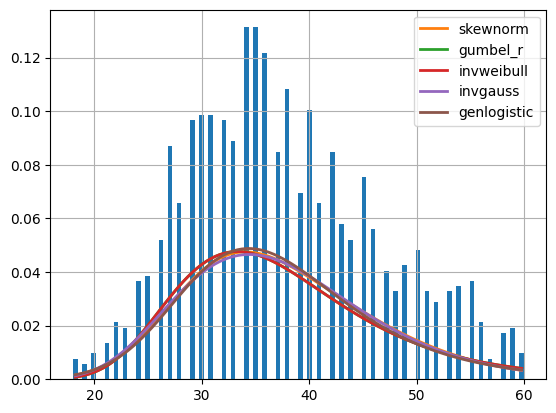

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data_not_attrited["Age"],
           distributions=get_distributions()
)
f.fit()
f.summary()

In [ ]:
# best 20 distributions by ks_pvalue
f.df_errors.dropna().sort_values(by="ks_pvalue", ascending=False).head(20)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
skewnorm,0.111453,820.983947,836.335564,inf,0.034255,0.108213
invgauss,0.111514,821.329072,836.680688,inf,0.035366,0.089357
genlogistic,0.111626,825.263761,840.615377,inf,0.037322,0.062843
ncf,0.111628,823.472574,849.058602,inf,0.040073,0.037091
mielke,0.112127,829.928032,850.396854,inf,0.042029,0.024924
burr,0.112127,829.928284,850.397106,inf,0.042030,0.024923
gengamma,0.111698,820.475255,840.944077,inf,0.042284,0.023635
f,0.111694,820.882442,841.351264,inf,0.042472,0.022720
fisk,0.112237,826.847935,842.199551,inf,0.043077,0.019990
norminvgauss,0.111715,822.396901,842.865723,inf,0.043338,0.018904


p-value for the Kolmogorov-Smirnov test for the attrition group 'Yes': 0.23113399510117194
p-value for the Kolmogorov-Smirnov test for the attrition group 'No': 0.10821314499483292


<Axes: xlabel='Age', ylabel='Density'>

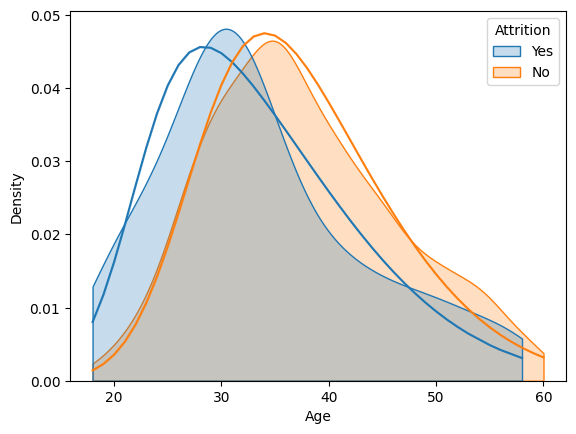

In [ ]:
# prompt: perform a Kolmogorov–Smirnov test for data.Age grouped by attrition using skewnorm fitting include graphs

import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kstest
from fitter import Fitter, get_common_distributions, get_distributions

# También puede leer el archivo desde el repositorio de GitHub.
data = pd.read_csv("https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/CHR_data.csv")

# Fit a skewnorm distribution to the data for each attrition group.
data_attrited = data[data["Attrition"] == "Yes"]
data_not_attrited = data[data["Attrition"] == "No"]

# Fit the skewnorm distribution to the data.
fit_attrited = stats.skewnorm.fit(data_attrited["Age"])
fit_not_attrited = stats.skewnorm.fit(data_not_attrited["Age"])

# Perform the Kolmogorov-Smirnov test.
_, pval = kstest(data_attrited["Age"], stats.skewnorm.cdf, args=fit_attrited)
print("p-value for the Kolmogorov-Smirnov test for the attrition group 'Yes':", pval)

_, pval = kstest(data_not_attrited["Age"], stats.skewnorm.cdf, args=fit_not_attrited)
print("p-value for the Kolmogorov-Smirnov test for the attrition group 'No':", pval)

# Plot the fitted distributions.
sns.kdeplot(data=data, x="Age", hue="Attrition", common_norm=False, fill=True, cut=0)
sns.lineplot(x=data_attrited["Age"], y=stats.skewnorm.pdf(data_attrited["Age"], *fit_attrited))
sns.lineplot(x=data_not_attrited["Age"], y=stats.skewnorm.pdf(data_not_attrited["Age"], *fit_not_attrited))

<Axes: xlabel='Age', ylabel='Proportion'>

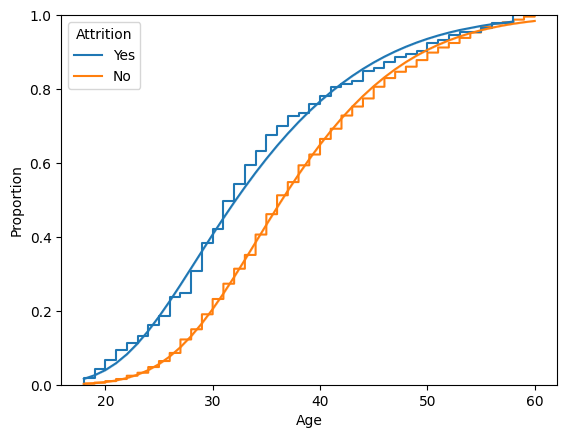

In [ ]:
# prompt: plot an empirical cdf for data.Age grouped by attrition and plot the skewnorm fitted cdf

import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kstest
from fitter import Fitter, get_common_distributions, get_distributions

# También puede leer el archivo desde el repositorio de GitHub.
data = pd.read_csv("https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/CHR_data.csv")

# Plot an empirical CDF for data.Age grouped by attrition.
sns.ecdfplot(data=data, x="Age", hue="Attrition")

# Fit a skewnorm distribution to the data for each attrition group.
data_attrited = data[data["Attrition"] == "Yes"]
data_not_attrited = data[data["Attrition"] == "No"]

# Fit the skewnorm distribution to the data.
fit_attrited = stats.skewnorm.fit(data_attrited["Age"])
fit_not_attrited = stats.skewnorm.fit(data_not_attrited["Age"])

# Plot the fitted skewnorm CDFs.
sns.lineplot(x=data_attrited["Age"], y=stats.skewnorm.cdf(data_attrited["Age"], *fit_attrited))
sns.lineplot(x=data_not_attrited["Age"], y=stats.skewnorm.cdf(data_not_attrited["Age"], *fit_not_attrited))


# Construcción de un "Quantile-Quantile" (QQ) plot envelope por simulación

Implica generar datos simulados de la distribución teórica asumida y calcular los cuantiles teóricos esperados. Luego, se repite este proceso muchas veces para obtener una estimación de la variabilidad en los cuantiles observados. Aquí te presento los pasos generales:

1. **Selección de Distribución Teórica:**
   - Elige la distribución teórica con la que deseas comparar tus datos observados.

2. **Generación de Datos Simulados:**
   - Genera un gran número de conjuntos de datos simulados desde la distribución teórica seleccionada. La cantidad de conjuntos debe ser suficientemente grande para obtener una estimación robusta.

3. **Cálculo de Cuantiles Teóricos:**
   - Calcula los cuantiles teóricos correspondientes a diferentes niveles de probabilidad para la distribución teórica seleccionada.

4. **Construcción del QQ Plot para Cada Conjunto Simulado:**
   - Para cada conjunto de datos simulados, ordena los datos de manera ascendente y calcula los cuantiles observados. Luego, construye un QQ plot para ese conjunto específico.

5. **Acumulación de Cuantiles Observados:**
   - Acumula los cuantiles observados para cada conjunto simulado.

6. **Cálculo de Cuantiles del Envelope:**
   - Para cada nivel de probabilidad, calcula los cuantiles que definen el envelope utilizando, por ejemplo, percentiles específicos de la distribución acumulada de los cuantiles acumulados.

7. **Construcción del QQ Plot con Envelope:**
   - Representa gráficamente los cuantiles acumulados observados junto con el envelope calculado alrededor de la línea de igualdad.

8. **Interpretación:**
   - Evalúa visualmente si la mayoría de los puntos del QQ plot están dentro del envelope. Si la mayoría lo está, sugiere que los datos observados son consistentes con la distribución teórica seleccionada.

9. **Análisis de la Simulación:**
   - Analiza la variabilidad en la posición de los cuantiles observados para obtener información sobre la incertidumbre en el ajuste.

Este enfoque de simulación proporciona una manera robusta de construir un QQ plot envelope, permitiendo una evaluación más completa de la incertidumbre asociada con la comparación entre los datos observados y la distribución teórica asumida. La variabilidad en los cuantiles observados reflejará la variabilidad inherente en los datos y ayudará en la interpretación del ajuste de la distribución.

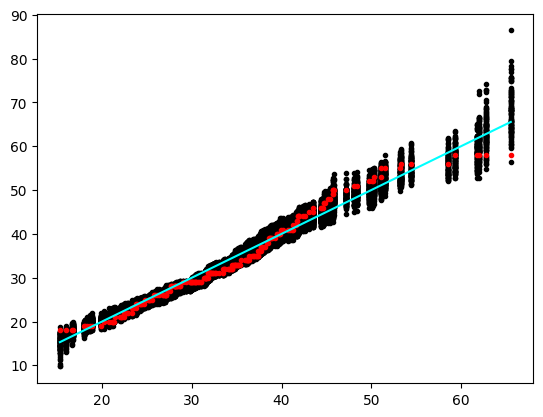

In [ ]:
x_ref = np.sort(stats.skewnorm.rvs(*fit_attrited, size=len(data_attrited)))  # This is equivalent to the ECDF
for i in range(100):  # create 100 samples from the hypothesized distribution
    x_rvs = np.sort(stats.skewnorm.rvs(*fit_attrited, size=len(data_attrited)))  # This is equivalent to the ECDF
    plt.plot(x_ref, x_rvs, '.k')  # Q-Q plot
plt.plot(x_ref, np.sort(data_attrited["Age"]), '.r') # Q-Q plot
plt.plot(x_ref, x_ref, 'cyan')  # line y = x

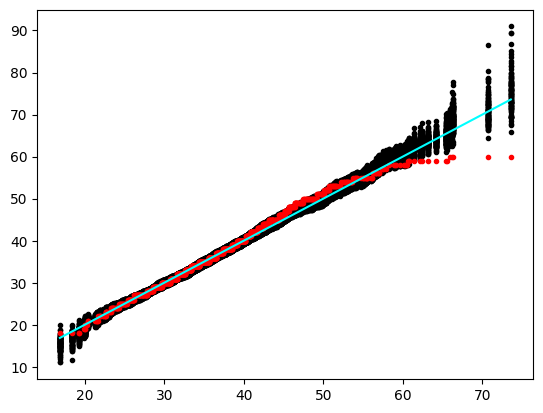

In [ ]:
x_ref = np.sort(stats.skewnorm.rvs(*fit_not_attrited, size=len(data_not_attrited)))  # This is equivalent to the ECDF
for i in range(100):  # create 100 samples from the hypothesized distribution
    x_rvs = np.sort(stats.skewnorm.rvs(*fit_not_attrited, size=len(data_not_attrited)))  # This is equivalent to the ECDF
    plt.plot(x_ref, x_rvs, '.k')  # Q-Q plot
plt.plot(x_ref, np.sort(data_not_attrited["Age"]), '.r') # Q-Q plot
plt.plot(x_ref, x_ref, 'cyan')  # line y = x

https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=468d3185-d200-4f9b-a3ed-ece1001be9fc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>